In [1]:
import mne
import numpy as np
import math

In [11]:
# Some code from Aliaksandr
def segment_epochs(full_epochs, condition, segm_length_sec):
    duration = len(full_epochs[condition].get_data()[0][0])/256
    n_segm = math.floor(duration/segm_length_sec)
    epochs_list = []
    x = 0
    k = 0 ### a time shifter to make sure all shorter epochs have the same times
    for i in range(0,n_segm):
        cond_epochs = mne.EpochsArray(data = full_epochs[condition].get_data(),info=full_epochs.info,verbose=False)
        shorter_epochs = cond_epochs.crop(tmin=x,tmax=x+segm_length_sec,include_tmax=False,verbose=False)
        shorter_epochs.shift_time(k, relative=True)
        epochs_list.append(shorter_epochs)
        k = -x-segm_length_sec
        x = x+segm_length_sec
    conc_object = mne.concatenate_epochs(epochs_list, add_offset=True,verbose=False) ### concatenate
    final_object = mne.EpochsArray(data = conc_object.get_data(), info = conc_object.info,verbose=False) ### resent indices
    return(final_object)

In [ ]:
# 1. Loading the files, removing first 2 seconds for each condition and first 2 practice trials (6 epochs)
if pair_n == 2030:
    practice_trial_cut = 12
else:
    practice_trial_cut = 6
epochs_full_a = mne.read_epochs(pathlib.Path(folder+f'/a_{ref}_epo.fif'),verbose=False).crop(tmin=2)[practice_trial_cut:]
epochs_full_b = mne.read_epochs(pathlib.Path(folder+f'/b_{ref}_epo.fif'),verbose=False).crop(tmin=2)[practice_trial_cut:]

segm_length_sec = 6
segments_to_remove =  bad_short_epochs[f"{pair_n}_open"]

xxx_a = segment_epochs(full_epochs = epochs_full_a, condition = 'open', segm_length_sec = segm_length_sec)
s1_raw = np.delete(xxx_a.get_data(), obj = segments_to_remove, axis = 0)

xxx_b = segment_epochs(full_epochs = epochs_full_b, condition = 'open', segm_length_sec = segm_length_sec)
s2_raw = np.delete(xxx_b.get_data(), obj = segments_to_remove, axis = 0)

In [17]:
epochs_path = "/Users/s204684/mnt/Circling Experiment preprocessed/"
subject = "pair2010_a_ave_epo.fif"
epochs = mne.read_epochs(f"{epochs_path}/{subject}", preload=True)

Reading /Users/s204684/mnt/Circling Experiment preprocessed/pair2010_a_ave_epo.fif ...
    Found the data of interest:
        t =       0.00 ...   19996.09 ms
        0 CTF compensation matrices available
Not setting metadata
66 matching events found
No baseline correction applied
0 projection items activated


In [18]:
epochs.info


<Info | 12 non-empty values
 bads: []
 ch_names: Fp1, AF7, AF3, F1, F3, F5, F7, FT7, FC5, FC3, FC1, C1, C3, C5, ...
 chs: 64 EEG
 custom_ref_applied: True
 dig: 67 items (3 Cardinal, 64 EEG)
 file_id: 4 items (dict)
 highpass: 1.0 Hz
 lowpass: 40.0 Hz
 meas_date: 2024-04-24 15:07:40 UTC
 meas_id: 4 items (dict)
 nchan: 64
 projs: []
 sfreq: 256.0 Hz
 subject_info: <subject_info | >
>

In [19]:
epochs.event_id


{'closed1': 11, 'open': 12, 'closed2': 13}

In [20]:
for key in epochs.event_id.keys():
    print(f"{key}: {len(epochs[key])}")

closed1: 22
open: 22
closed2: 22


In [26]:
import pickle

bad_short_epochs = pickle.load(open("/Users/s204684/mnt/Circling Experiment Data/circling_experiment_data/dict_with_short_bad_epochs.pickle", "rb"))
print(bad_short_epochs)

# count total number of bad epochs
total_bad_epochs = sum(len(v) for v in bad_short_epochs.values())
print(f"Total number of bad epochs: {total_bad_epochs}")

{'2010_closed1': [], '2020_closed1': [5, 16], '2030_closed1': [], '2040_closed1': [], '2050_closed1': [38, 54], '2060_closed1': [], '2070_closed1': [], '2080_closed1': [52], '2090_closed1': [], '2100_closed1': [], '2110_closed1': [], '2120_closed1': [np.int64(13), np.int64(17)], '2130_closed1': [], '2140_closed1': [np.int64(2)], '2150_closed1': [np.int64(47)], '2160_closed1': [], '2170_closed1': [], '2180_closed1': [], '2190_closed1': [], '2200_closed1': [np.int64(47)], '2210_closed1': [], '2220_closed1': [], '2230_closed1': [], '2240_closed1': [np.int64(4), np.int64(16), np.int64(35)], '2250_closed1': [np.int64(8)], '2260_closed1': [], '2270_closed1': [np.int64(33), np.int64(54)], '2280_closed1': [], '2290_closed1': [], '2300_closed1': [], '2310_closed1': [], '2320_closed1': [], '2330_closed1': [], '2340_closed1': [], '2350_closed1': [], '2360_closed1': [], '2370_closed1': [np.int64(14)], '2380_closed1': [], '2390_closed1': [], '2410_closed1': [np.int64(5), np.int64(9)], '2420_closed1

In [22]:

practice_trial_cut = 6
epochs = epochs.crop(tmin=2)[practice_trial_cut:]
for key in epochs.event_id.keys():
    print(f"{key}: {len(epochs[key])}")

closed1: 20
open: 20
closed2: 20


In [23]:

#import dictionary saved as pkl
segm_length_sec = 6
segments_to_remove =  bad_short_epochs[f"2010_open"]
print(f"Segmens to remove: {segments_to_remove}")
open_epochs = segment_epochs(full_epochs = epochs, condition = 'open', segm_length_sec = segm_length_sec)
print(open_epochs.get_data().shape)
cleaned_open_epochs = np.delete(open_epochs.get_data(), obj = segments_to_remove, axis = 0)
print(cleaned_open_epochs.shape)

Segmens to remove: []
(60, 64, 1536)
(60, 64, 1536)


/var/folders/h6/wwzpvb4141g4m6j_2c1k19gr0000gp/T/ipykernel_38480/3096010702.py:10: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsArray'>.tmax (17.9961 s)
  shorter_epochs = cond_epochs.crop(tmin=x,tmax=x+segm_length_sec,include_tmax=False,verbose=False)


Using matplotlib as 2D backend.


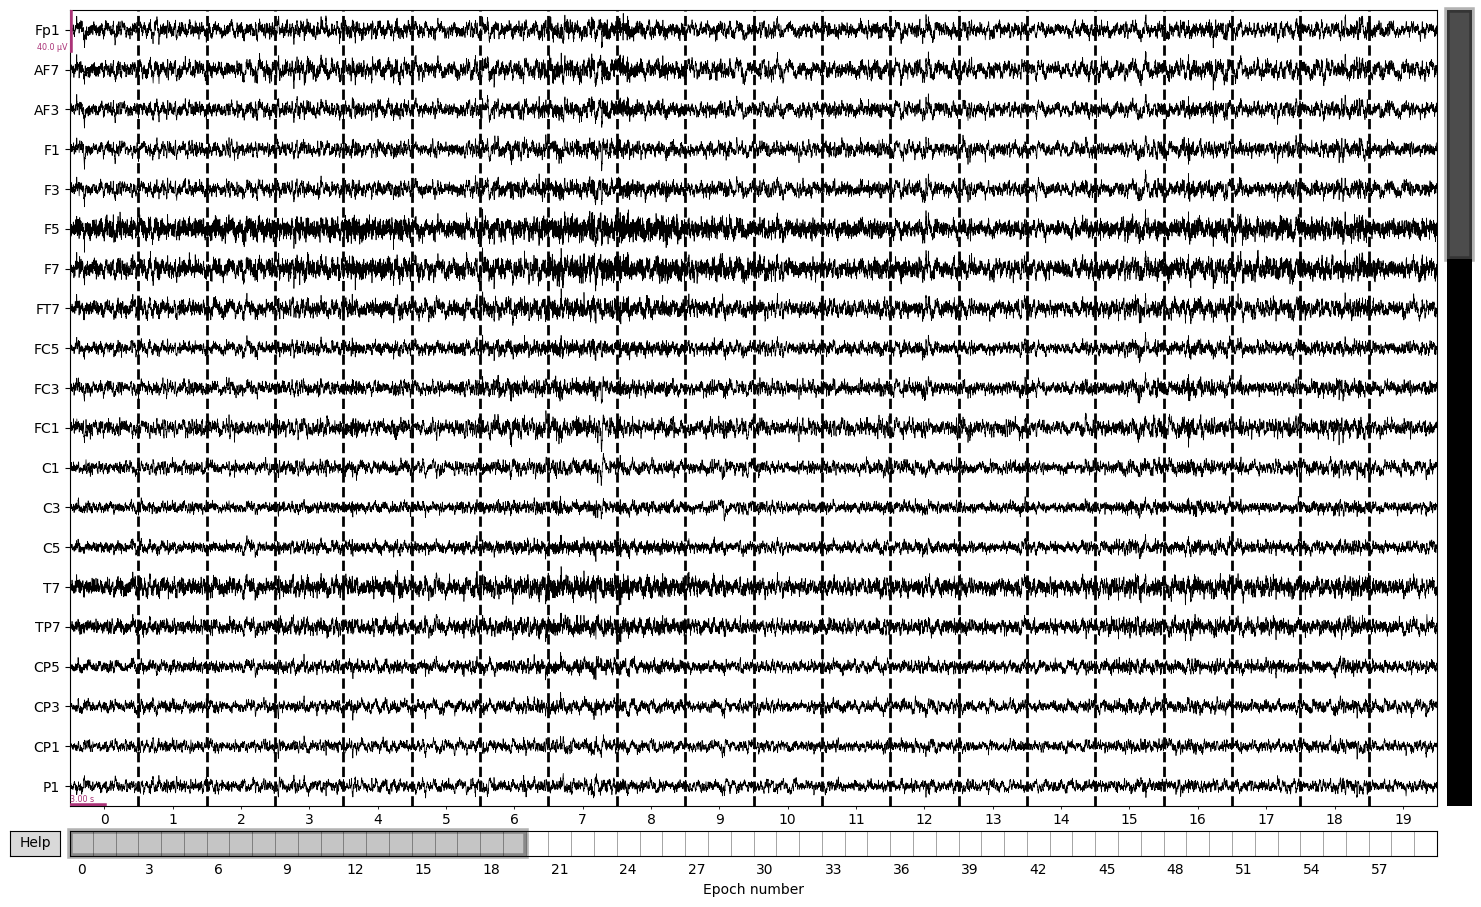

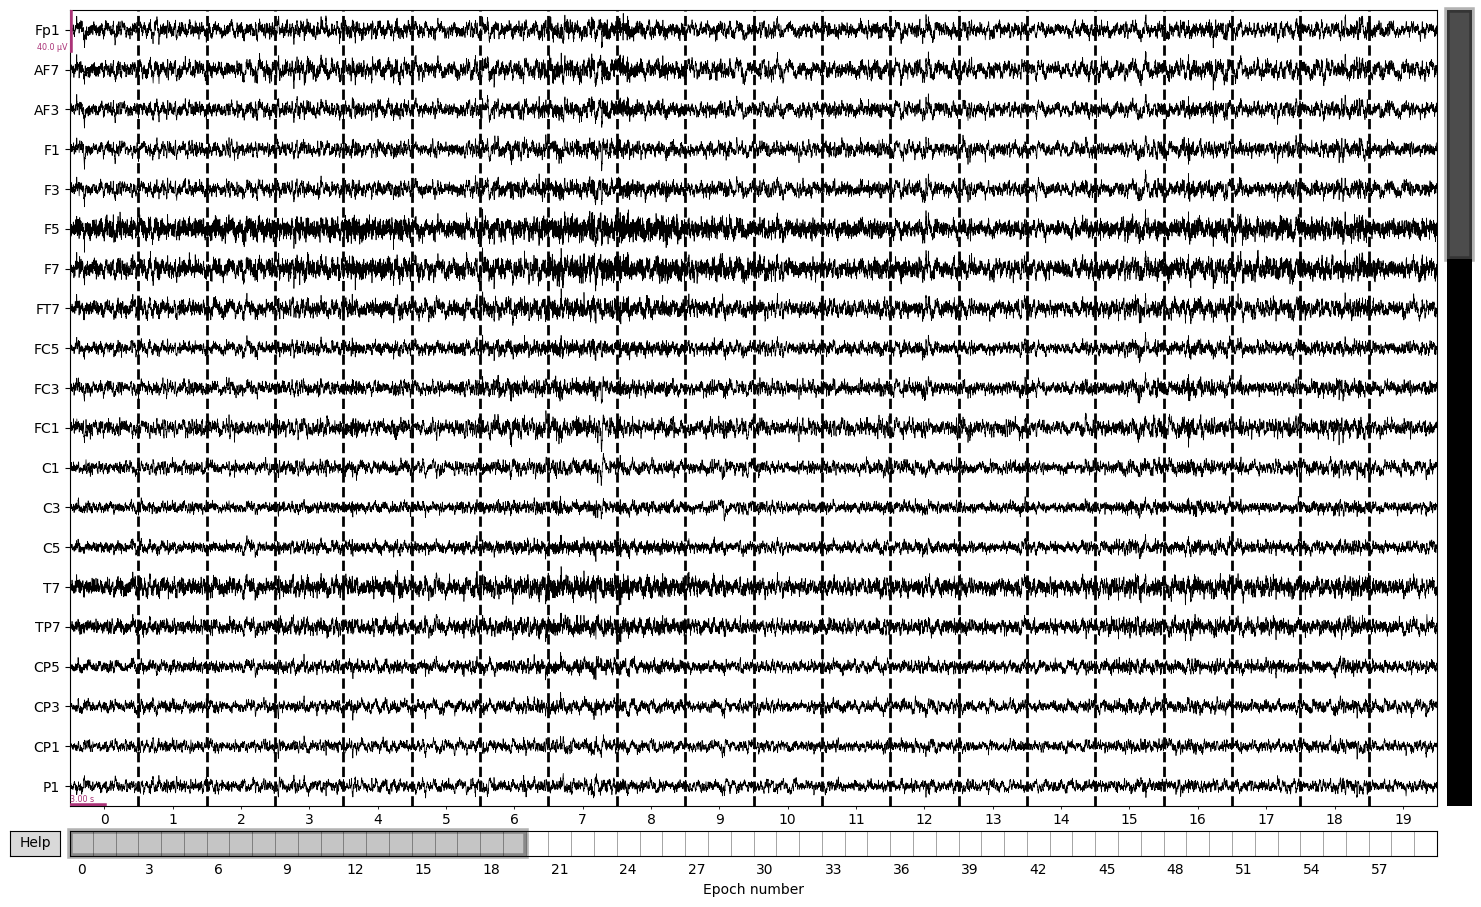

In [25]:
open_epochs.plot()